# 基于梯度下降的逻辑回归模型

本文主要介绍了使用梯度下降方法实现的逻辑回归模型，并且可视化了模型训练过程

- hypothesis function

\begin{equation}  
h_\theta(x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1x_1 + ... + \theta_nx_n)}}
\end{equation} 

- cost function

\begin{equation} 
J(\theta) = -\frac{1}{m}\displaystyle\sum_{i=1}^{m}(y^{(i)}log(h_\theta(x^{(i)})) + (1 - y^{(i)})log(1 - h_\theta(x^{(i)})))
\end{equation} 

- 权重梯度

\begin{equation}
\frac{\partial}{\partial\theta_n}J(\theta) = \frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_n^{(i)}
\end{equation}

其中，用于偏置计算的$x_0^{(i)}$的是为1的向量

- 权重更新

\begin{align}
\theta_n &= \theta_n - \alpha\frac{\partial}{\partial\theta_n}J(\theta) \\
&= \theta_n - \alpha\frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_n^{(i)}
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=1e-3, n_iter=50, record_weights=False):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.record_weights = record_weights
        
        self.recorded_weights = []        
        self.costs = []
        self.accuracy = []
    
    def fit(self, X, y):
        # 增加一列全为1的向量，用于更新偏置
        bias_X = np.column_stack((np.ones(X.shape[0]), X))
        # 随机初始化权重
        self.weights = np.random.normal(scale=0.05, size=bias_X.shape[1])
        for _ in range(self.n_iter):
            cost = self.__cal_cost(bias_X, y)
            self.costs.append(cost)
            acc = self.__cal_accuracy(X, y)
            self.accuracy.append(acc)
            
            # 更新权重(公式4)
            self.weights = self.weights - self.learning_rate * self.__cal_weights_gradient(bias_X, y)
            if self.record_weights:
                self.recorded_weights.append(np.copy(self.weights))
                
        if self.record_weights:
            self.recorded_weights = np.array(self.recorded_weights)
            
    # 计算模型输出(公式1)
    def __activate(self, X):
        return 1 / (1 + np.exp(-1 * np.dot(X, self.weights)))
    
    # 计算cost(公式2)
    def __cal_cost(self, X, y):
        total_cost = -1 * (np.dot(y.T, np.log(self.__activate(X))) + 
                           np.dot((1 - y).T, np.log(1 - self.__activate(X))))
        return total_cost / len(y)
    
    # 计算权重梯度(公式3)
    def __cal_weights_gradient(self, X, y):
        return np.dot(X.T, self.__activate(X) - y) / len(y)
    
    # 计算准确率
    def __cal_accuracy(self, X, y):
        return np.sum(self.predict(X) == y) / len(y)
    
    def get_weights(self):
        return {'bias': self.weights[0], 'weights': self.weights[1:]}
    
    def predict(self, X, pred_prob=False):
        bias_X = np.column_stack((np.ones(X.shape[0]), X))
        prob = self.__activate(bias_X)
        if pred_prob:
            return prob
        return np.round(prob)
    
    def plot_cost(self):
        fig = plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.plot(self.costs)
        plt.ylabel('cost', fontsize=15)
        plt.xlabel('iter', fontsize=15)
        
        plt.subplot(122)
        plt.plot(self.accuracy)
        plt.ylim((0, 1))
        plt.ylabel('accuracy', fontsize=15)
        plt.xlabel('iter', fontsize=15)
        plt.show()

## 训练模型

- 生成模拟数据

根据如下函数产生模拟数据  
$f(x) = 4 + x_0 + 2x_1 + 3x_2 + \varepsilon$, 其中$\varepsilon \sim N(0, 1)$  
$
y =
  \begin{cases}
    1  & \quad f(x) \ge 0\\
    0  & \quad f(x) \lt 0
  \end{cases}
$

In [3]:
X = np.random.randn(1000, 3)
f = np.apply_along_axis(lambda x: x[0] + 2 * x[1] - 3 * x[2] + 0.5, 1, X) + np.random.randn(1000)
y = np.where(f >= 0, 1, 0)

- 训练模型

In [4]:
lr = LogisticRegressionGD(learning_rate=0.03, n_iter=1800)

lr.fit(X, y)

- 查看回归的权重

In [5]:
lr.get_weights()

{'bias': 0.5332302096106282,
 'weights': array([ 1.09506573,  1.98834562, -2.98125386])}

模型的权重比较接近模拟生成数据的公式

- 查看cost和准确率的变化情况

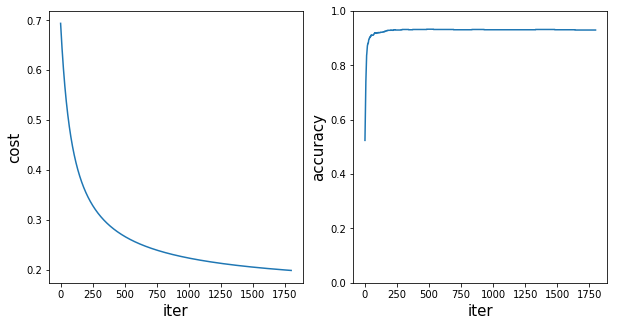

In [6]:
lr.plot_cost()

# 可视化模型训练过程

In [7]:
from matplotlib import cm

In [8]:
X = np.random.randn(500, 2)
f = np.apply_along_axis(lambda x: x[0] + 2 * x[1] - 1, 1, X) + np.random.randn(500)
y = np.where(f >= 0, 1, 0)

In [9]:
lr = LogisticRegressionGD(learning_rate=0.03, n_iter=600, record_weights=True)

lr.fit(X, y)
lr.get_weights()

{'bias': -0.9695118881533945, 'weights': array([0.84576928, 1.80876813])}

- 绘制Decision Boundary（决策边界）变化

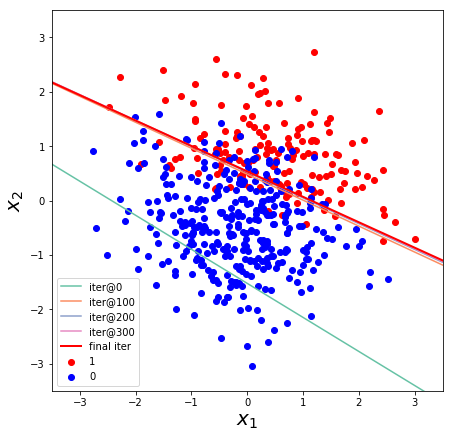

In [10]:
fig = plt.figure(figsize=(7, 7))
X_pos = X[y == 1]
X_neg = X[y == 0]
plt.scatter(X_pos[:, 0], X_pos[:, 1], label='1', color='red')
plt.scatter(X_neg[:, 0], X_neg[:, 1], label='0', color='blue')

x = np.linspace(-4, 4, 10)
cmap = cm.get_cmap('Set2')
for c_ind, w_ind in enumerate(range(0, 400, 100)):
    theta0, theta1, theta2 = lr.recorded_weights[w_ind, :]
    slope = -1 * theta1 / theta2
    intercept = -1 * theta0 / theta2
    line = slope * x + intercept
    plt.plot(x, line, color=cmap(c_ind), label='iter@%d' % w_ind)
    
theta0, theta1, theta2 = lr.weights
slope = -1 * theta1 / theta2
intercept = -1 * theta0 / theta2
line = slope * x + intercept
plt.plot(x, line, color='r', linewidth=2, label='final iter')

plt.ylim((-3.5, 3.5))
plt.xlim((-3.5, 3.5))
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)
plt.legend()
plt.show()